<h2 align=center>Analyze Worldwide Box Office Revenue with Plotly and Python</h2>
<img src="revenue.png">

## Libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import datetime
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LinearRegression


"import lightgbm as lgb\nfrom scipy import stats\nfrom scipy.sparse import hstack, csr_matrix\nfrom sklearn.model_selection import train_test_split, KFold\nfrom collections import Counter\nfrom nltk.corpus import stopwords\nfrom nltk.util import ngrams\nfrom sklearn.preprocessing import StandardScaler\nimport nltk\nnltk.download('stopwords')\nstop = set(stopwords.words('english'))\nimport os\nimport plotly.offline as py\npy.init_notebook_mode(connected=True)\nimport plotly.graph_objs as go\nimport plotly.tools as tls\nimport xgboost as xgb\nimport lightgbm as lgb\nfrom sklearn import model_selection\nfrom sklearn.metrics import accuracy_score\nimport json\nimport ast\nfrom urllib.request import urlopen\nfrom PIL import Image\nfrom sklearn.preprocessing import LabelEncoder\nimport time\nfrom sklearn.metrics import mean_squared_error\nfrom sklearn import linear_model"

## Data Loading and Exploration

In [2]:
train = pd.read_csv('C:/Users/User/Desktop/Box_office_Project/tmdb-box-office-prediction/train.csv')
test = pd.read_csv('C:/Users/User/Desktop/Box_office_Project/tmdb-box-office-prediction/test.csv')

In [3]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


## Visualizing the Target Distribution

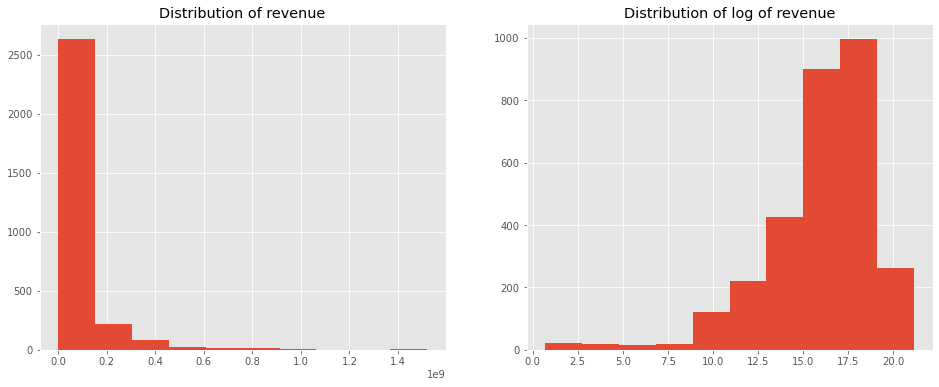

In [4]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(train['revenue']);
plt.title('Distribution of revenue');
plt.subplot(1, 2, 2)
plt.hist(np.log1p(train['revenue']));
plt.title('Distribution of log of revenue');

In [5]:
train['log_revenue'] = np.log1p(train['revenue'])

## Relationship between Film Revenue and Budget

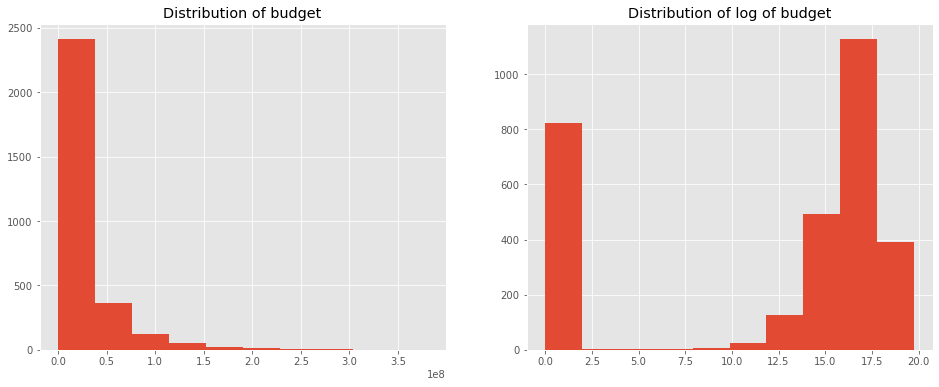

In [6]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(train['budget']);
plt.title('Distribution of budget');
plt.subplot(1, 2, 2)
plt.hist(np.log1p(train['budget']));
plt.title('Distribution of log of budget');

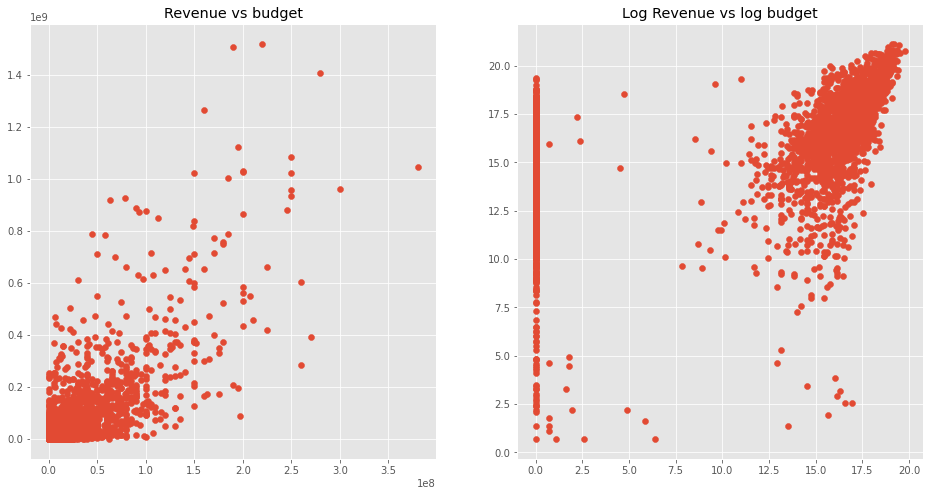

In [7]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(train['budget'], train['revenue'])
plt.title('Revenue vs budget');
plt.subplot(1, 2, 2)
plt.scatter(np.log1p(train['budget']), train['log_revenue'])
plt.title('Log Revenue vs log budget');

In [8]:
train['log_budget'] = np.log1p(train['budget'])
test['log_budget'] = np.log1p(test['budget'])

## Does having an Official Homepage Affect Revenue?

In [9]:
train['homepage'].value_counts().head(10)

http://www.transformersmovie.com/                                        4
http://www.thehobbit.com/                                                2
http://www.lordoftherings.net/                                           2
http://movies.disney.com/james-and-the-giant-peach                       1
http://www.mgm.com/view/movie/757/Goldeneye/                             1
http://www.lamalaeducacion.com                                           1
http://www.thewaterdiviner.com/                                          1
http://detroitfirefilm.org/                                              1
http://www.foxmovies.com/movies/eddie-the-eagle                          1
http://www.lorberfilms.com/who-is-harry-nilsson/who-is-harry-nilsson/    1
Name: homepage, dtype: int64

In [10]:
train['has_homepage'] = 0
train.loc[train['homepage'].isnull() == False, 'has_homepage'] = 1
test['has_homepage'] = 0
test.loc[test['homepage'].isnull() == False, 'has_homepage'] = 1

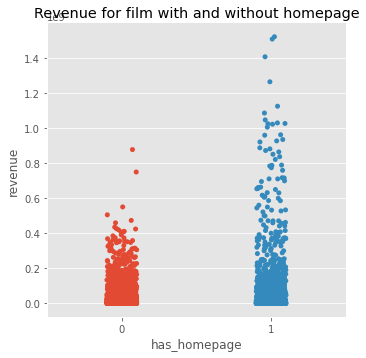

In [11]:
sns.catplot(x='has_homepage', y='revenue', data=train);
plt.title('Revenue for film with and without homepage');

## Distribution of Languages in Film

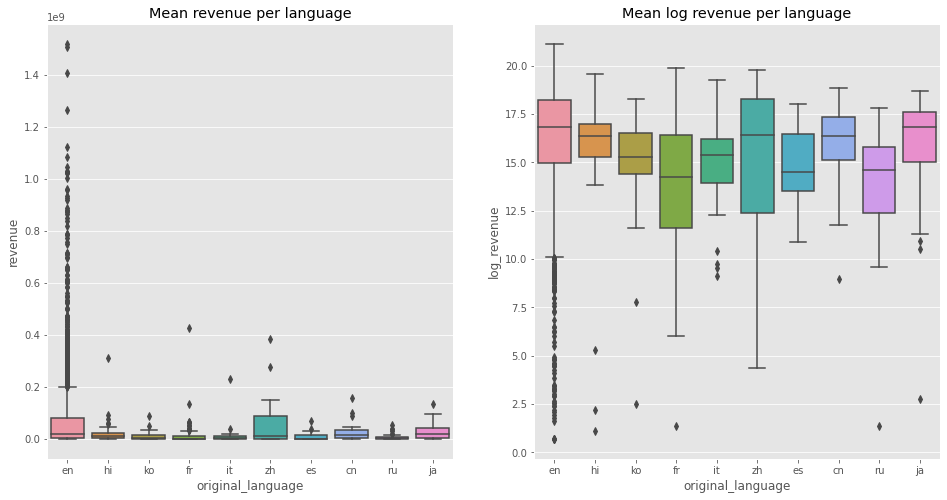

In [12]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x='original_language', y='revenue', data=train.loc[train['original_language'].isin(train['original_language'].value_counts().head(10).index)]);
plt.title('Mean revenue per language');
plt.subplot(1, 2, 2)
sns.boxplot(x='original_language', y='log_revenue', data=train.loc[train['original_language'].isin(train['original_language'].value_counts().head(10).index)]);
plt.title('Mean log revenue per language');

## Frequent Words in Film Titles and Discriptions

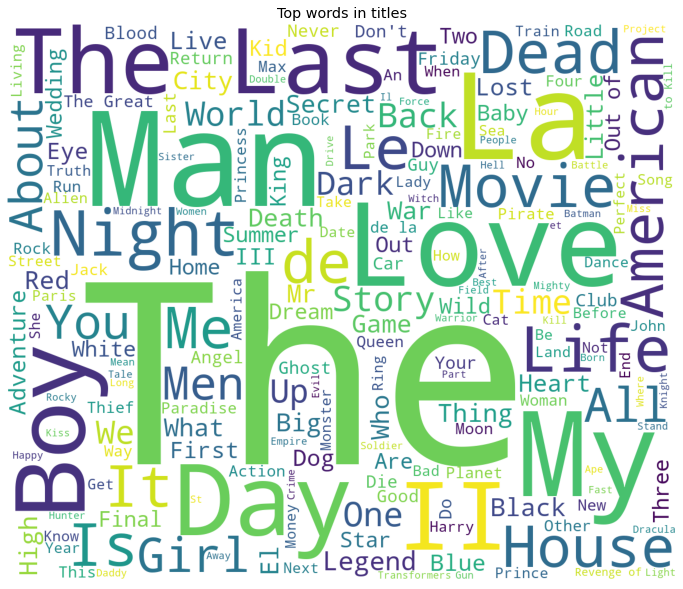

In [35]:
plt.figure(figsize = (12, 12))
text = ' '.join(train['original_title'].values)
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words in titles')
plt.axis("off")
plt.show()

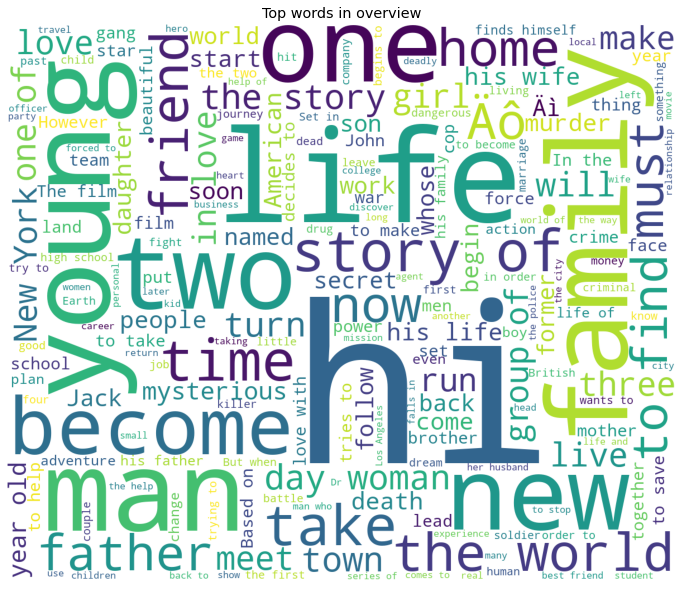

In [14]:
plt.figure(figsize = (12, 12))
text = ' '.join(train['overview'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words in overview')
plt.axis("off")
plt.show()

## Do Film Descriptions Impact Revenue?

In [15]:
import eli5

vectorizer = TfidfVectorizer(
            sublinear_tf=True,
            analyzer='word',
            token_pattern=r'\w{1,}',
            ngram_range=(1, 2),
            min_df=5)

overview_text = vectorizer.fit_transform(train['overview'].fillna(''))
linreg = LinearRegression()
linreg.fit(overview_text, train['log_revenue'])
eli5.show_weights(linreg, vec=vectorizer, top=20, feature_filter=lambda x: x != '<BIAS>')

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [16]:
print('Target value:', train['log_revenue'][1000])
eli5.show_prediction(linreg, doc=train['overview'].values[1000], vec=vectorizer)

Target value: 16.44583954907521


## Analyzing Movie Release Dates

In [17]:
test.loc[test['release_date'].isnull()==False, 'release_date'].head()   

0    7/14/07
1    5/19/58
2    5/23/97
3     9/4/10
4    2/11/05
Name: release_date, dtype: object

## Preprocessing Features

In [18]:
def fix_date(x):
    year= x.split('/')[2]
    if int(year) <= 19:
        return x[:-2] + '20' + year
    else: 
        return x[:-2] + '19' + year

In [19]:
test.loc[test['release_date'].isnull() == True].head()   

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,log_budget,has_homepage
828,3829,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0210130,en,"Jails, Hospitals & Hip-Hop","Jails, Hospitals &amp; Hip-Hop is a cinematic ...",0.009057,NaN,NaN,NaN,NaN,90.0,NaN,NaN,three worlds / two million voices / one genera...,"Jails, Hospitals & Hip-Hop",NaN,[],NaN,0.0,0


In [20]:
test.loc[test['release_date'].isnull() == True, 'release_date'] = '05/01/00'   

In [21]:
train['release_date'] = train['release_date'].apply(lambda x: fix_date(x))
test['release_date'] = test['release_date'].apply(lambda x: fix_date(x))

## Creating Features Based on Release Date

In [22]:
train['release_date'] = pd.to_datetime(train['release_date'])
test['release_date'] = pd.to_datetime(test['release_date'])

In [23]:
def process_date(df):
    date_parts = ['year', 'weekday', 'month', 'weekofyear', 'day', 'quarter']
    for part in date_parts:
        part_col = 'release_date' + '_' + part
        df[part_col] = getattr(df['release_date'].dt, part).astype(int)
    return df


In [24]:
train = process_date(train)
test = process_date(test)

## Using Plotly to Visualize the Number of Films Per Year

In [25]:
d1 = train['release_date_year'].value_counts().sort_index()
d2 = test['release_date_year'].value_counts().sort_index()


In [26]:
import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objs as go

data = [go.Scatter(x = d1.index, y = d1.values, name='train'),
       go.Scatter(x = d2.index, y = d2.values, name='test')]

layout = go.Layout(dict(title = 'Number of films per year',
                      xaxis = dict(title = 'Year'),
                      yaxis = dict(title = 'Number of Films'),
                      ), legend = dict(orientation = 'v'))
    
py.iplot(dict(data = data, layout = layout))

## Number of Films and Revenue Per Year

In [27]:
d1 = train['release_date_year'].value_counts().sort_index()
d2 = train.groupby(['release_date_year'])['revenue'].sum()


data = [go.Scatter(x = d1.index, y = d1.values, name='film count'),
       go.Scatter(x = d2.index, y = d2.values, name='total revenue', yaxis='y2')]

layout = go.Layout(dict(title = 'Number of films and total revenue per year',
                      xaxis = dict(title = 'Year'),
                      yaxis = dict(title = 'Number of Films'),
                        yaxis2 = dict(title = 'Total revenue', overlaying = 'y', side = 'right')
                      ), legend = dict(orientation = 'v'))
    
py.iplot(dict(data = data, layout = layout))


In [40]:
d1 = train['release_date_year'].value_counts().sort_index()
d2 = train.groupby(['release_date_year'])['revenue'].mean()

data = [go.Scatter(x = d1.index, y = d1.values, name='film count'),
       go.Scatter(x = d2.index, y = d2.values, name='mean revenue', yaxis='y2')]

layout = go.Layout(dict(title = 'Number of films and average revenue per year',
                      xaxis = dict(title = 'Year'),
                      yaxis = dict(title = 'Number of Films'),
                        yaxis2 = dict(title = 'Average revenue', overlaying = 'y', side = 'right')
                      ), legend = dict(orientation = 'v'))
    
py.iplot(dict(data = data, layout = layout))


## Do Release Days Impact Revenue?

Text(0.5, 1.0, 'Revenue of different days of the week')

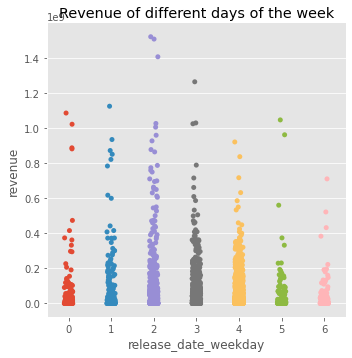

In [29]:
sns.catplot(x='release_date_weekday', y = 'revenue', data=train);
plt.title('Revenue of different days of the week')

## Relationship between Runtime and Revenue

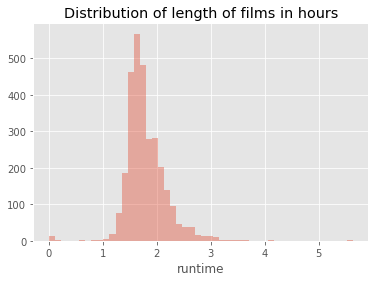

In [41]:
sns.distplot(train['runtime'].fillna(0) / 60, kde=False);
plt.title('Distribution of length of films in hours');

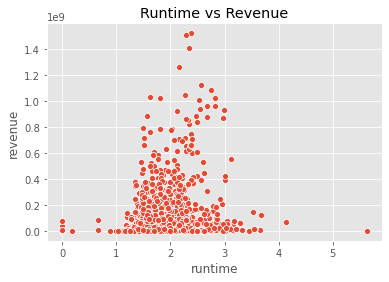

In [31]:
sns.scatterplot(train['runtime'].fillna(0) / 60, train['revenue'])
plt.title('Runtime vs Revenue');